In [1]:
!pip install git+https://github.com/openai/CLIP.git
!pip install torch torchvision

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-bye9yzmw
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-bye9yzmw
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.5 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=01db8d6c7ba36ca4d1dbf8f9aef3c0a1d76f86b644a25ac0e4e1f3c1a64eb7ec
  Stored in directory: /tmp/pip-ephem-wheel-cache-9d6xqswf/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [11]:
import clip
import torch
from google.colab import files
from PIL import Image
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt


In [3]:
# Carregar o modelo CLIP
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device)

100%|███████████████████████████████████████| 338M/338M [00:06<00:00, 51.9MiB/s]


In [5]:
uploaded = files.upload()

image_path = next(iter(uploaded))
image = Image.open(image_path)

image.show()

Saving image-test.jpg to image-test.jpg


In [6]:
image_input = preprocess(image).unsqueeze(0).to(device)


with torch.no_grad():
    image_features = model.encode_image(image_input)

image_features = image_features / image_features.norm(dim=-1, keepdim=True)

print("Embedding gerado para a imagem:", image_features)

Embedding gerado para a imagem: tensor([[ 1.7256e-02,  3.5732e-02,  1.9601e-02,  1.0308e-02, -1.5059e-02,
         -6.3259e-03, -1.4800e-02,  5.6013e-02,  5.7610e-02, -1.3230e-02,
         -1.5663e-02, -1.1685e-02, -1.7164e-02,  5.6516e-03, -1.0512e-02,
          2.2011e-02,  9.2881e-02,  1.9875e-02, -9.5744e-03, -1.7737e-02,
         -1.3337e-02,  2.3850e-02, -8.7430e-03, -6.0017e-02,  9.8628e-03,
          5.2935e-02, -8.0935e-03, -1.5169e-02,  4.3434e-03, -2.0398e-02,
         -3.1644e-02,  1.1939e-02,  6.6822e-03,  6.5049e-03, -4.8978e-03,
          2.2151e-02, -3.0494e-02,  2.7168e-02, -2.3278e-02,  4.8315e-02,
         -2.1504e-02, -9.5005e-03,  2.3993e-03, -1.8838e-02,  2.3886e-02,
          6.5297e-02,  1.1441e-02, -9.0994e-03,  7.2569e-02, -1.4905e-03,
          8.3470e-03, -1.0267e-02,  3.6690e-02, -4.0119e-03,  2.6935e-03,
          1.3061e-02, -3.0884e-02,  2.5288e-02, -1.5525e-03,  2.9676e-02,
          4.5110e-02,  2.0549e-02,  1.6186e-02, -1.9425e-03, -1.4719e-02,
      

In [10]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

dataset_embeddings = []

for img in train_images[:1000]:
    img = Image.fromarray(img)
    img = preprocess(img).unsqueeze(0).to(device)
    with torch.no_grad():
        img_features = model.encode_image(img)
    img_features = img_features / img_features.norm(dim=-1, keepdim=True)
    dataset_embeddings.append(img_features.cpu().numpy())

dataset_embeddings = np.array(dataset_embeddings)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


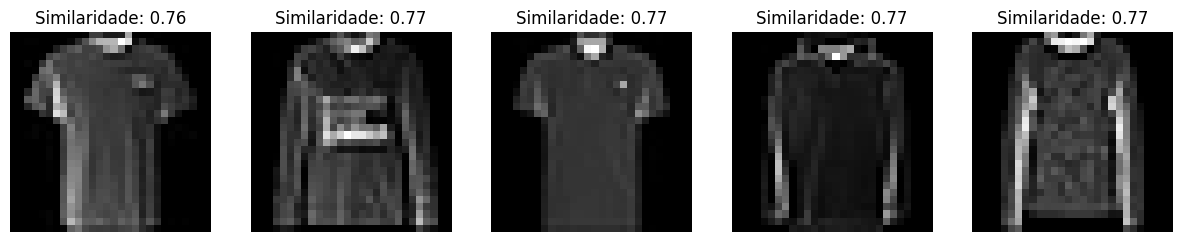

In [13]:
similarities = cosine_similarity(image_features.cpu().numpy(), dataset_embeddings.reshape(len(dataset_embeddings), -1))

top_5_indices = similarities.argsort()[0][-5:]

plt.figure(figsize=(15, 10))
for i, idx in enumerate(top_5_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(train_images[idx], cmap='gray')
    plt.title(f'Similaridade: {similarities[0][idx]:.2f}')
    plt.axis('off')

plt.show()